# TELECOM CHURN CASE STUDY

## PROBLEM STATEMENT

Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. Understanding and defining Churn: There are various ways to define churn, such as: Revenue-based churn Usage-based churn For this project, you will use the usage-based definition to define churn. Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. Business Objective and Data: The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful. Understanding Customer Behaviour During Churn: Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle : The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.) The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [180]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### %matplotlib inline command renders the plot inline in notebook and store it.

## 1) READING AND UNDERSTANDING THE DATA

In [181]:
# Importing the Telecom Churn dataset
data = pd.read_csv('C:\\Users\\asus\\Downloads\\Telecom Churn Case Study\\telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [182]:
# Lets check the shape of the dataset
data.shape

(99999, 226)

### There are 99,999 rows and 226 columns present in dataset.

In [183]:
# Lets check the general information abount the datatypes of the columns
data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### There are 179 columns with float64 datatype, 35 columns with int64 datatype and 12 columns having object datatype.

In [184]:
# Now lets check the statistical information of numerical columns in dataset
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## 2) DATA CLEANING

In [185]:
# Lets create a function that returns the null values present in the dataset
def MissingVal(Null_Cutoff):
    Null = round((data.isnull().sum()/len(data.index))*100)
    return Null.loc[Null>Null_Cutoff]

### The function MissingVal returns the null values present in each column that are above the Null_Cutoff. Null_Cutoff is nothing but the % of null values present in each column.

In [186]:
MissingVal(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

### The columns with null values greater than 50% are shown above. The columns total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, arpu_3g, arpu_2g, night_pck_user, fb_user are important for further analysis. We have to impute these columns and drop the remaining column i.e date_of_last_rech_data as it indicates the dates where last recharge was done by customer; not so important.

### Columns to be imputed contain numerical data. Imputing mean or median in this case will not be relaible. Therefore we will impute 0 in place of missing values.

In [187]:
# Lets make a function that returns imputation of 0 in place of null values in all the columns.  
imputedcolslist = [ 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                   'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                   'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                   'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
                   'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
                   'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9' ]         # List of Cols that to be imputed 

def ImputeCols(Data, ImputedColsList):
    for col in imputedcolslist:
        data[col].fillna(0, inplace=True)

# Lets impute 0 in place of null values in all the columns
ImputeCols(data, imputedcolslist)

In [188]:
# Now lets check the cols with missing values again
MissingVal(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [189]:
# We left with 4 cols with missing values contain above 50%. We dont need those cols in our analysis. So, lets drop it.
Dropcolslist = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
                'date_of_last_rech_data_8', 'date_of_last_rech_data_9']    # List of cols that to be dropped.

data.drop(Dropcolslist, axis=1, inplace=True)

In [190]:
# Now lets identify the columns with missing values greater than 5%
MissingVal(5)

onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

### All the columns above contains suffix 'mou' which is nothing but minutes of usage of voice calls in different conditions such as within the same operator network, outside the operator T network, roaming incomming, outgoing etc. We know that those columns are numerical. Therefore we will impute 0 in place of null values of those columns as dropping those cols will not be appropriate.

In [191]:
# Lets make a function that returns imputation of 0 in place of null values in all the columns.
imputedcolslist2 = ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
                   'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
                   'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9',
                    'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9',
                   'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 
                    'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9',
                   'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']        # List of Cols that to be imputed 

def ImputeCols(Data, ImputedColsList):
    for col in imputedcolslist2:
        data[col].fillna(0, inplace=True)

# Lets impute 0 in place of null values in all the columns
ImputeCols(data, imputedcolslist2)

In [192]:
# Now lets identify the cols with missing values greater than 2%
MissingVal(2)

onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
                      ... 
ic_others_6            4.0
ic_others_7            4.0
ic_others_8            5.0
date_of_last_rech_8    4.0
date_of_last_rech_9    5.0
Length: 89, dtype: float64

### All the above columns contain null values greater than 2% and less than 5%. Lets see the missing value data in above cols.

In [193]:
# Viewing the null value data
colslist3 = list(MissingVal(2).index)
data[data[colslist3].isnull().all(axis=1)][colslist3]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### All the above cols contain data about customer of months 6,7 and 8. Those cols contain missing values greater than 2% i.e more than 2% data of customer of months 6,7 and 8 are missing. We will drop those missing records as the missing % is small, dropping those records will not affect further analysis.

In [194]:
# Lets drop the missing records
data = data[~data[colslist3].isnull().all(axis=1)]
data.shape

(99618, 222)

In [195]:
# Checking above cols agin with null values
MissingVal(2)

onnet_mou_6            4.0
onnet_mou_7            3.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           3.0
                      ... 
ic_others_6            4.0
ic_others_7            3.0
ic_others_8            5.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
Length: 89, dtype: float64

### We can see here, the above cols still contains null values greater than 2% with decreased level than earlier. We will impute those null values with 0.

In [196]:
# First remove date cols from colslist3 and then impute 0 in place of nulls in all other cols
colslist3.remove('date_of_last_rech_8')
colslist3.remove('date_of_last_rech_9')

def ImputeCols(Data, ImputedColsList):
    for col in colslist3:
        data[col].fillna(0, inplace=True)


ImputeCols(data, colslist3)

In [197]:
# Checking remaining cols with null values
MissingVal(0)

loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

### We left with above cols that contain null values greater than 0% and less than 2% except date cols. Lets check the value counts for each of above col.

In [198]:
# Make a list of above cols
colslist4 = list(MissingVal(0).index)

# Make a function that returns value counts for each of above col
def val_count(Data, ColsList):
    for col in colslist4:
        print(col)
        print(data[col].value_counts())
        print()

In [199]:
val_count(data, colslist4)

loc_og_t2o_mou
0.0    98981
Name: loc_og_t2o_mou, dtype: int64

std_og_t2o_mou
0.0    98981
Name: std_og_t2o_mou, dtype: int64

loc_ic_t2o_mou
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64

last_date_of_month_8
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64

last_date_of_month_9
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64

date_of_last_rech_6
6/30/2014    16959
6/29/2014    12915
6/27/2014    11154
6/28/2014     9483
6/26/2014     5523
6/25/2014     4886
6/17/2014     4135
6/24/2014     4118
6/14/2014     3826
6/21/2014     3742
6/23/2014     2902
6/18/2014     2735
6/12/2014     2493
6/22/2014     2342
6/13/2014     2132
6/19/2014     2004
6/20/2014     1801
6/16/2014     1115
6/15/2014      867
6/11/2014      574
6/8/2014       507
6/5/2014       315
6/7/2014       312
6/10/2014      274
6/3/2014       227
6/1/2014       209
6/9/2014       196
6/6/2014       159
6/4/2014       126
6/2/2014       105
Name: date_of_last_rech_6, dtype: int64

date_of_last_

### We can see there are only one value present in loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_8, last_date_of_month_9 columns. Less than 1% values in above mensioned columns are null. So we will drop those columns as there are all zeroes present. In columns date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8, date_of_last_rech_9 we will impute the respective mode values.

In [200]:
# Make a list of above cols
colslist5 = list(MissingVal(0).index)

def ImputeCols(Data, ImputedColsList):
    for col in colslist5:
        data[col].fillna(data[col].mode()[0], inplace=True)


ImputeCols(data, colslist5)

In [201]:
# Lets check the columns with all the values zero
col_zer0 = data.columns[(data==0).all()]
col_zer0

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [202]:
# Lets drop the above columns
data.drop(col_zer0, axis=1, inplace=True)

In [203]:
data.shape

(99618, 211)

### We left with 211 features in dataset after dropping the unwanted.

In [204]:
# Checking the general information about the columns
data.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99618 entries, 0 to 99998
Data columns (total 211 columns):
 #    Column                Dtype  
---   ------                -----  
 0    mobile_number         int64  
 1    circle_id             int64  
 2    last_date_of_month_6  object 
 3    last_date_of_month_7  object 
 4    last_date_of_month_8  object 
 5    last_date_of_month_9  object 
 6    arpu_6                float64
 7    arpu_7                float64
 8    arpu_8                float64
 9    arpu_9                float64
 10   onnet_mou_6           float64
 11   onnet_mou_7           float64
 12   onnet_mou_8           float64
 13   onnet_mou_9           float64
 14   offnet_mou_6          float64
 15   offnet_mou_7          float64
 16   offnet_mou_8          float64
 17   offnet_mou_9          float64
 18   roam_ic_mou_6         float64
 19   roam_ic_mou_7         float64
 20   roam_ic_mou_8         float64
 21   roam_ic_mou_9         float64
 22   roam_og_mou_6       

### There are columns jun_vbc_3g, jul_vbc_3g, aug_vbc_3g, sep_vbc_3g have not standard naming. So we have to rename those columns.

In [205]:
# Renaming the columns
colsrename = {'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}

data.rename(columns=colsrename, inplace=True)

### The columns vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8, vol_2g_mb_9 and columns vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, vol_3g_mb_9 represents the mobile internet usage volume in MB. We will derive a new feature 'Vol_data_MB' which will cover all the information of above columns.

In [206]:
# Lets derive new Variable
data['Vol_data_MB_6'] = data['vol_2g_mb_6']+data['vol_3g_mb_6'].astype(int)
data['Vol_data_MB_7'] = data['vol_2g_mb_7']+data['vol_3g_mb_7'].astype(int)
data['Vol_data_MB_8'] = data['vol_2g_mb_8']+data['vol_3g_mb_8'].astype(int)
data['Vol_data_MB_9'] = data['vol_2g_mb_9']+data['vol_3g_mb_9'].astype(int)

### We have columns total_rech_num_6, total_rech_num_7, total_rech_num_8, total_rech_num_9 and columns total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, total_rech_amt_9. So we can derive new feature 'total_avg_rech_amt' .

In [207]:
# Lets derive new variable
data['total_avg_rech_amt_6'] = (data['total_rech_amt_6'])/(data['total_rech_num_6']+1)
data['total_avg_rech_amt_7'] = (data['total_rech_amt_7'])/(data['total_rech_num_7']+1)
data['total_avg_rech_amt_8'] = (data['total_rech_amt_8'])/(data['total_rech_num_8']+1)
data['total_avg_rech_amt_9'] = (data['total_rech_amt_9'])/(data['total_rech_num_9']+1)

### There are columns count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_2g_9 and columns count_rech_3g_6, count_rech_3g_7, count_rech_3g_8, count_rech_3g_9. So we can derive new feature 'total_rech_count'. 

In [208]:
# Lets derive new variable
data['total_rech_count_6'] = data['count_rech_2g_6']+data['count_rech_3g_6'].astype(int)
data['total_rech_count_7'] = data['count_rech_2g_7']+data['count_rech_3g_7'].astype(int)
data['total_rech_count_8'] = data['count_rech_2g_8']+data['count_rech_3g_8'].astype(int)
data['total_rech_count_9'] = data['count_rech_2g_9']+data['count_rech_3g_9'].astype(int)

### We derived the columns total_avg_rech_amt_6, total_avg_rech_amt_7, total_avg_rech_amt_8, total_avg_rech_amt_9 and total_rech_count_6, total_rech_count_7, total_rech_count_8, total_rech_count_9. From above columns we can calculate 'total_rech_amt_data' .


In [209]:
# Lets derive new variable
data['total_rech_amt_data_6'] = data['total_avg_rech_amt_6']*data['total_rech_count_6']
data['total_rech_amt_data_7'] = data['total_avg_rech_amt_7']*data['total_rech_count_7']
data['total_rech_amt_data_8'] = data['total_avg_rech_amt_8']*data['total_rech_count_8']
data['total_rech_amt_data_9'] = data['total_avg_rech_amt_9']*data['total_rech_count_9']

### We have columns total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, total_rech_amt_9 and columns total_rech_amt_data_6, total_rech_amt_data_7, total_rech_amt_data_8, total_rech_amt_data_9. If we add these two features we get 'total_monthly_rech'.

In [210]:
data['total_monthly_rech_6'] = data['total_rech_amt_6'] + data['total_rech_amt_data_6']
data['total_monthly_rech_7'] = data['total_rech_amt_7'] + data['total_rech_amt_data_7']
data['total_monthly_rech_8'] = data['total_rech_amt_8'] + data['total_rech_amt_data_8']
data['total_monthly_rech_9'] = data['total_rech_amt_9'] + data['total_rech_amt_data_9']

In [211]:
# Lets check if null values are present in derived columns
colslistderived = ['Vol_data_MB_6', 'Vol_data_MB_7', 'Vol_data_MB_8', 'Vol_data_MB_9',
                  'total_avg_rech_amt_6', 'total_avg_rech_amt_7', 'total_avg_rech_amt_8', 'total_avg_rech_amt_9',
                  'total_rech_count_6', 'total_rech_count_7', 'total_rech_count_8', 'total_rech_count_9',
                  'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8', 'total_rech_amt_data_9',
                  'total_monthly_rech_6', 'total_monthly_rech_7', 'total_monthly_rech_8', 'total_monthly_rech_9']

data[colslistderived].isnull().sum()

Vol_data_MB_6            0
Vol_data_MB_7            0
Vol_data_MB_8            0
Vol_data_MB_9            0
total_avg_rech_amt_6     0
total_avg_rech_amt_7     0
total_avg_rech_amt_8     0
total_avg_rech_amt_9     0
total_rech_count_6       0
total_rech_count_7       0
total_rech_count_8       0
total_rech_count_9       0
total_rech_amt_data_6    0
total_rech_amt_data_7    0
total_rech_amt_data_8    0
total_rech_amt_data_9    0
total_monthly_rech_6     0
total_monthly_rech_7     0
total_monthly_rech_8     0
total_monthly_rech_9     0
dtype: int64

### We can see there are null values present in some columns. We will impute 0 in place of null values.

In [212]:
# Lets impute the missing values columns

def ImputeCols(Data, ImputedColsList):
    for col in colslistderived:
        data[col].fillna(0, inplace=True)


ImputeCols(data, colslistderived)

### We know that the customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months, i.e. the good phase are high value customers. Lets filter out those customers.

In [213]:
# Finding high value customers

# The first two months are of good phase. Lets calculate the avg rech amt of good phase
good_phs_avg = (data['total_monthly_rech_6'] + data['total_monthly_rech_7'])/2

# Lets calculate the 70th % of good phase
cutoff70 = np.percentile(good_phs_avg, 70)

# Lets apply the condition for high value cust
high_val_cust = data[good_phs_avg >= cutoff70]


# Lets check the length and % of high value cust
print('Length of HVCust:', len(high_val_cust))
print('% of HVCust:', len(high_val_cust)/data.shape[0]*100)

Length of HVCust: 29895
% of HVCust: 30.009636812624223


### There are 30% high value customers who have recharged with an amount more than or equal to 70% of avg recharge amount of good phase.

### We are interested to find churn customers out of all high valued customers. We will now tag the churned customers (churn=1, else 0) based on the fourth month as per the following definition: Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. We need total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 columns to tag churners.

In [214]:
# Lets create a function that returns the number of churners
def churned_cust(Data):
    features = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
    flag = ~data[[feature for feature in features]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [215]:
# Lets create a new column 'churn' in high_val_cust data to represent the churners
high_val_cust['churn'] = churned_cust(high_val_cust)

# # Lets check the length and % of churners
print('Length of churners:', len(high_val_cust[high_val_cust.churn == 1]))
print('% of churners:', len(high_val_cust[high_val_cust.churn == 1])/high_val_cust.shape[0]*100)

Length of churners: 2531
% of churners: 8.466298712159224


C:\Users\asus\AppData\Local\Temp/ipykernel_5480/417713241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_cust['churn'] = churned_cust(high_val_cust)


### There are 8.5% of churners present in high value customers.

## 3) EDA

In [216]:
# Filtering the common monthly columns for each month
common_cols = high_val_cust.filter(regex ='_7').columns
monthly_cols = [item.strip('_7') for item in common_cols]
monthly_cols

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'Vol_data_MB',
 'total_avg_rech_amt',
 'total_rech_count',
 'total_rech_amt_data',
 'total_monthly_rech']

### Those are the common columns present for all months.

In [217]:
# Removing all the attributes corresponding to the 9th month from high value cust data
col_list_9 = high_val_cust.filter(regex=('_9')).columns
high_val_cust.drop(col_list_9,axis=1,inplace=True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [218]:
# Obtaining the list of all the monthly columns 6,7,8
allmonthlycols = [C + N for N in ['_6','_7','_8'] for C in monthly_cols]
allmonthlycols

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'Vol_data_MB_6',
 'total_avg

### All the features for months 6,7 and 8 are listed above. Still, there are some features other than monthly cols.

In [219]:
# Lets find the non monthly cols from high value cust
nonmonthlycols = [col for col in high_val_cust.columns if col not in allmonthlycols]
nonmonthlycols

['mobile_number', 'circle_id', 'aon', 'churn']

In [220]:
# Make a function that returns value counts for each of above col

def val_count(Data, ColsList):
    for col in nonmonthlycols:
        print(col)
        print(high_val_cust[col].value_counts())
        print()
        
val_count(high_val_cust, nonmonthlycols)

mobile_number
7000701601    1
7000280683    1
7000966912    1
7001295155    1
7000661819    1
             ..
7000433247    1
7001373274    1
7001360563    1
7000889879    1
7001905007    1
Name: mobile_number, Length: 29895, dtype: int64

circle_id
109    29895
Name: circle_id, dtype: int64

aon
3651    500
2372    195
495     110
494      93
492      83
       ... 
3492      1
3277      1
2110      1
3027      1
3562      1
Name: aon, Length: 3319, dtype: int64

churn
0    27364
1     2531
Name: churn, dtype: int64



### The column circle_id has only one value present. We will drop this column as this is not useful for further analysis.

In [221]:
# Dropping the col circle_id
high_val_cust.drop('circle_id', axis=1, inplace=True)

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/3362453683.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


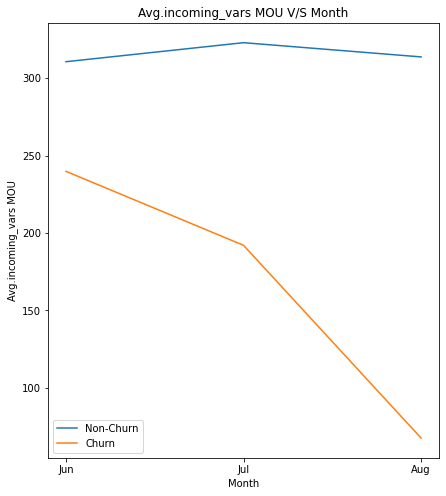

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/3362453683.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


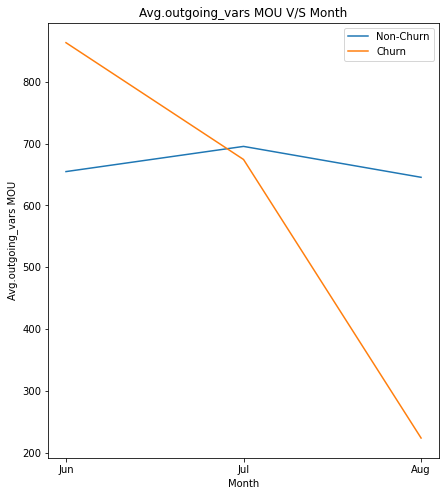

In [222]:
# Lets check the plot of incoming/outgoing MOU w.r.t month 

# First create a list of independent vars
incoming_vars = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
outgoing_vars = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']

# Lets group by the data by churn and aggregate it w.r.t. independent vars
df1 = high_val_cust.groupby(['churn'])[incoming_vars].mean().T
df2 = high_val_cust.groupby(['churn'])[outgoing_vars].mean().T

# Lets plot the graph for Avg.incoming_vars MOU V/S Month
fig, ax = plt.subplots(figsize=(7,8))
plt.plot(df1)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.incoming_vars MOU")
plt.title("Avg.incoming_vars MOU V/S Month")
plt.show()

# Lets plot the graph for Avg.outgoing_vars MOU V/S Month
fig, ax = plt.subplots(figsize=(7,8))
plt.plot(df2)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.outgoing_vars MOU")
plt.title("Avg.outgoing_vars MOU V/S Month")
plt.show()

### From the above graph we can see that for churners the avg incoming and outgoing MOU decreases drastically after 2nd month. On the other hand, for non churners it reamins stable w.r.t month. Therefore we can say that, the attribute MOU is important criteria for predicting the churners.

In [223]:
# Creating new feature 'OG_MOU_to_IC_MOU' for each month
high_val_cust['OG_MOU_to_IC_MOU_6'] = (high_val_cust['total_og_mou_6'])/(high_val_cust['total_ic_mou_6']+1)
high_val_cust['OG_MOU_to_IC_MOU_7'] = (high_val_cust['total_og_mou_7'])/(high_val_cust['total_ic_mou_7']+1)
high_val_cust['OG_MOU_to_IC_MOU_8'] = (high_val_cust['total_og_mou_8'])/(high_val_cust['total_ic_mou_8']+1)

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/1028842438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_cust['OG_MOU_to_IC_MOU_6'] = (high_val_cust['total_og_mou_6'])/(high_val_cust['total_ic_mou_6']+1)
C:\Users\asus\AppData\Local\Temp/ipykernel_5480/1028842438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_cust['OG_MOU_to_IC_MOU_7'] = (high_val_cust['total_og_mou_7'])/(high_val_cust['total_ic_mou_7']+1)
C:\Users\asus\AppData\Local\Temp/ipykernel_5480/1028842438.py:4: SettingWi

### The new variable created will predict the churn more accurately.

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/2744968733.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


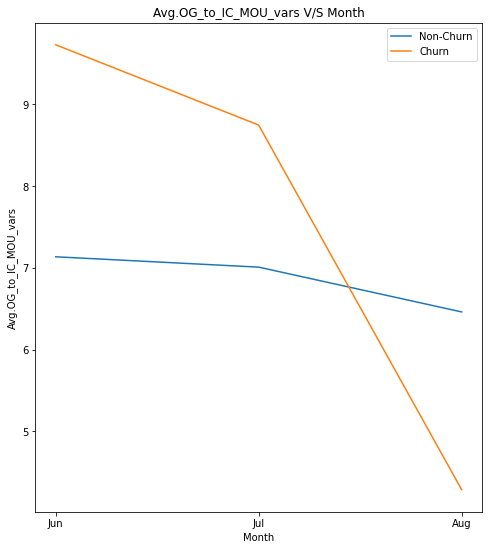

In [224]:
# Lets plot a graph of OG_MOU_to_IC_MOU w.r.t month

OG_to_IC_MOU_vars = ['OG_MOU_to_IC_MOU_6', 'OG_MOU_to_IC_MOU_7', 'OG_MOU_to_IC_MOU_8']

df3 = high_val_cust.groupby('churn')[OG_to_IC_MOU_vars].mean().T

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(df3)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.OG_to_IC_MOU_vars")
plt.title("Avg.OG_to_IC_MOU_vars V/S Month")

plt.show()

### The ratio of outgoing to incoming minutes of usage keeps decreasing significantly for churners after july. For nonchurners the ratio remains constant almost.

In [225]:
# Lets check the general information about the data
high_val_cust.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29895 entries, 7 to 99998
Data columns (total 177 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    mobile_number          int64  
 1    last_date_of_month_6   object 
 2    last_date_of_month_7   object 
 3    last_date_of_month_8   object 
 4    arpu_6                 float64
 5    arpu_7                 float64
 6    arpu_8                 float64
 7    onnet_mou_6            float64
 8    onnet_mou_7            float64
 9    onnet_mou_8            float64
 10   offnet_mou_6           float64
 11   offnet_mou_7           float64
 12   offnet_mou_8           float64
 13   roam_ic_mou_6          float64
 14   roam_ic_mou_7          float64
 15   roam_ic_mou_8          float64
 16   roam_og_mou_6          float64
 17   roam_og_mou_7          float64
 18   roam_og_mou_8          float64
 19   loc_og_t2t_mou_6       float64
 20   loc_og_t2t_mou_7       float64
 21   loc_og_t2t_mou_8       float64
 2

### We have columns loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8 and loc_og_mou_6, loc_og_mou_7, loc_og_mou_8. Lets create new feature 'loc_OG_to_IC_mou' which represents the ratio of outgoing to incoming minutes of usage for local calls within same telecom operator.

In [226]:
# Creating new feature 'loc_OG_to_IC_mou' for each month
high_val_cust['loc_OG_to_IC_mou_6'] = (high_val_cust['loc_og_mou_6'])/(high_val_cust['loc_ic_mou_6']+1)
high_val_cust['loc_OG_to_IC_mou_7'] = (high_val_cust['loc_og_mou_7'])/(high_val_cust['loc_ic_mou_7']+1)
high_val_cust['loc_OG_to_IC_mou_8'] = (high_val_cust['loc_og_mou_8'])/(high_val_cust['loc_ic_mou_8']+1)

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/3724375204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_cust['loc_OG_to_IC_mou_6'] = (high_val_cust['loc_og_mou_6'])/(high_val_cust['loc_ic_mou_6']+1)
C:\Users\asus\AppData\Local\Temp/ipykernel_5480/3724375204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_cust['loc_OG_to_IC_mou_7'] = (high_val_cust['loc_og_mou_7'])/(high_val_cust['loc_ic_mou_7']+1)
C:\Users\asus\AppData\Local\Temp/ipykernel_5480/3724375204.py:4: SettingWithCopyWa

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/1812115727.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


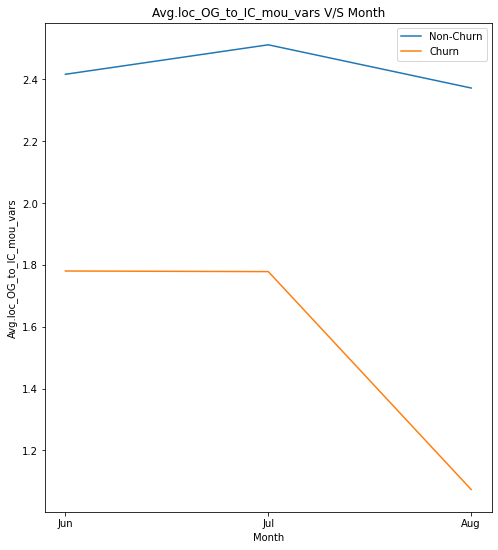

In [227]:
# Lets plot a graph of loc_OG_to_IC_mou w.r.t month

loc_OG_to_IC_mou_vars = ['loc_OG_to_IC_mou_6', 'loc_OG_to_IC_mou_7', 'loc_OG_to_IC_mou_8']

df3 = high_val_cust.groupby('churn')[loc_OG_to_IC_mou_vars].mean().T

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(df3)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.loc_OG_to_IC_mou_vars")
plt.title("Avg.loc_OG_to_IC_mou_vars V/S Month")

plt.show()

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/408803805.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


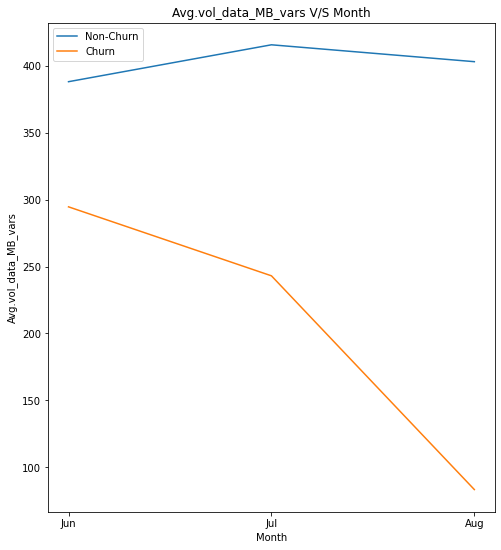

In [228]:
# Now lets check the graph of total volume data w.r.t month for churners and nonchurners

vol_data_MB_vars = ['Vol_data_MB_6', 'Vol_data_MB_7', 'Vol_data_MB_8']

df3 = high_val_cust.groupby('churn')[vol_data_MB_vars].mean().T

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(df3)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.vol_data_MB_vars")
plt.title("Avg.vol_data_MB_vars V/S Month")

plt.show()

### The volume of the data usage drops significantly for churners after a good phase.

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/2436095020.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


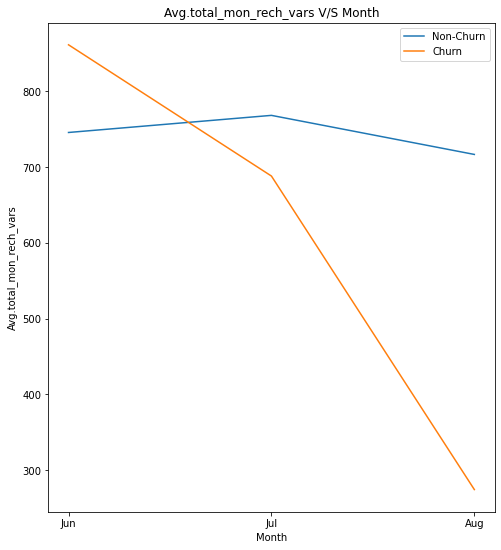

In [229]:
# Now lets check the graph of total monthly recharge w.r.t month for churners and nonchurners

total_mon_rech_vars = ['total_monthly_rech_6', 'total_monthly_rech_7', 'total_monthly_rech_8']

df3 = high_val_cust.groupby('churn')[total_mon_rech_vars].mean().T

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(df3)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.total_mon_rech_vars")
plt.title("Avg.total_mon_rech_vars V/S Month")

plt.show()

### The total monthly recharge amount paid by customer drops for churners after good phase. The customer likely to be churned lowers his expenditure on monthly recharge.

### We have columns loc_ic_mou and loc_og_mou. Adding these two variables will give 'total_loc_mou' for both incoming and outgoing. Similarly for columns roam_ic_mou and roam_og_mou, we will create 'total_roam_mou'. The derived features 'total_loc_mou' and 'total_roam_mou' will predict the churn rate accurately.

In [230]:
# Lets create a new var 'total_loc_mou' and 'total_roam_mou'

high_val_cust['total_loc_mou_6'] = high_val_cust['loc_ic_mou_6'] + high_val_cust['loc_og_mou_6'].astype(int)
high_val_cust['total_loc_mou_7'] = high_val_cust['loc_ic_mou_7'] + high_val_cust['loc_og_mou_7'].astype(int)
high_val_cust['total_loc_mou_8'] = high_val_cust['loc_ic_mou_8'] + high_val_cust['loc_og_mou_8'].astype(int)

high_val_cust['total_roam_mou_6'] = high_val_cust['roam_ic_mou_6'] + high_val_cust['roam_og_mou_6'].astype(int)
high_val_cust['total_roam_mou_7'] = high_val_cust['roam_ic_mou_7'] + high_val_cust['roam_og_mou_7'].astype(int)
high_val_cust['total_roam_mou_8'] = high_val_cust['roam_ic_mou_8'] + high_val_cust['roam_og_mou_8'].astype(int)

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/1308103155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_cust['total_loc_mou_6'] = high_val_cust['loc_ic_mou_6'] + high_val_cust['loc_og_mou_6'].astype(int)
C:\Users\asus\AppData\Local\Temp/ipykernel_5480/1308103155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_cust['total_loc_mou_7'] = high_val_cust['loc_ic_mou_7'] + high_val_cust['loc_og_mou_7'].astype(int)
C:\Users\asus\AppData\Local\Temp/ipykernel_5480/1308103155.py:5: Setting

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/2264299683.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


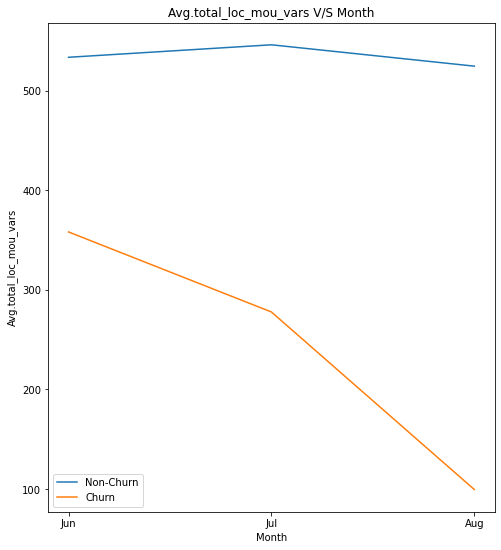

C:\Users\asus\AppData\Local\Temp/ipykernel_5480/2264299683.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jun','Jul','Aug'])


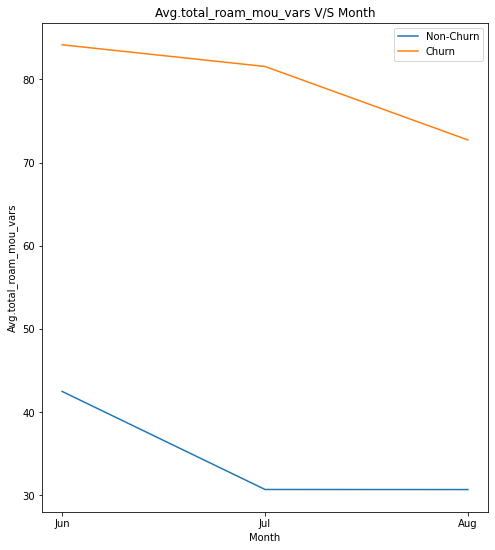

In [231]:
# lets check the variation of total_loc_mou w.r.t month for churners and nonchurners

total_loc_mou_vars = ['total_loc_mou_6', 'total_loc_mou_7', 'total_loc_mou_8']

df3 = high_val_cust.groupby('churn')[total_loc_mou_vars].mean().T

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(df3)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.total_loc_mou_vars")
plt.title("Avg.total_loc_mou_vars V/S Month")

plt.show()


# Similarly for variation of total_roam_mou w.r.t. month 

total_roam_mou_vars = ['total_roam_mou_6', 'total_roam_mou_7', 'total_roam_mou_8']

df3 = high_val_cust.groupby('churn')[total_roam_mou_vars].mean().T

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(df3)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.xlabel("Month")
plt.ylabel("Avg.total_roam_mou_vars")
plt.title("Avg.total_roam_mou_vars V/S Month")

plt.show()

### The customer who recievs or make a roaming call over the period of months is very likely to churn. The roaming minutes of usage of voice calls for churners is very high as compared to the non churners.

## 4) MODEL BUILDING

In [232]:
# Removing the columns that are not required for model building

high_val_cust_PCA = high_val_cust.copy()

high_val_cust_PCA.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'mobile_number',
                       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

In [233]:
high_val_cust_PCA.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29895 entries, 7 to 99998
Data columns (total 179 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       float64
 2

### We have 179 features for model building.

In [234]:
!pip install imblearn --user

In [235]:
# Importing required libraries 
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

In [236]:
# X variables
X = high_val_cust_PCA.drop(['churn'], axis=1)

In [237]:
# Y variables
y = high_val_cust_PCA['churn']  

In [238]:
# Spiltting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [239]:
# Making a copy of train dataset
X_train1 = X_train.copy()
X_test1 = X_test.copy()

In [240]:
# Scaling features using MinMaxScaler
scaler = MinMaxScaler()

In [241]:
# Fit and transform the scaler on train data
X_train1 = scaler.fit_transform(X_train.values)

# transforming the test using the already fit scaler
X_test1 = scaler.transform(X_test.values)

In [242]:
# Making data frame of independent training and testing variables 
X_train_df = pd.DataFrame(X_train1, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test1, index=X_test.index, columns=X_test.columns)

In [243]:
# Lets check the imbalance present in target variable
print('Before over_sampling the count of label 1:', sum(y_train==1))
print('Before over_sampling the count of label 0:', sum(y_train==0))
print('Before over_sampling the rate of churning in %:', sum(y_train==1)/len(y_train)*100)

Before over_sampling the count of label 1: 1796
Before over_sampling the count of label 0: 19130
Before over_sampling the rate of churning in %: 8.582624486285004


In [244]:
!pip install threadpoolctl==3.1.0

In [245]:
!pip install numpy==1.21.4 --user

In [246]:
# Handling class imbalance using SMOTE 
sm = SMOTE(random_state=45)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train_df, y_train)

In [247]:
# Lets check the data after resampling
print('After over_sampling the count of label 1:', sum(y_train_resampled==1))
print('After over_sampling the count of label 0:', sum(y_train_resampled==0))
print('After over_sampling the rate of churning in %:', sum(y_train_resampled==1)/len(y_train_resampled)*100)

print()

# Checking the shape of training data set
print('After over_sampling, the shape of X_train_resampled:', (X_train_resampled.shape))
print('After over_sampling, the shape of y_train_resampled:', (y_train_resampled.shape))

After over_sampling the count of label 1: 19130
After over_sampling the count of label 0: 19130
After over_sampling the rate of churning in %: 50.0

After over_sampling, the shape of X_train_resampled: (38260, 178)
After over_sampling, the shape of y_train_resampled: (38260,)


### After over sampling we get the equally balanced values in target variable.

In [248]:
# Doing PCA to get the most informative features of the data
pca = PCA(random_state=42)

# Fitting the algorithm onto the data
pca.fit(X_train_resampled)

# Checking the variance explained by each PC
pca.explained_variance_ratio_[:60]

array([5.23432803e-01, 1.04281022e-01, 7.47287334e-02, 5.15877908e-02,
       3.06810256e-02, 2.34444063e-02, 2.01447150e-02, 1.61682303e-02,
       1.57218573e-02, 1.34827138e-02, 1.04818154e-02, 1.00501706e-02,
       8.42156997e-03, 6.37548360e-03, 6.14132592e-03, 5.70434932e-03,
       4.00097192e-03, 3.91335109e-03, 3.56503488e-03, 3.49645886e-03,
       3.40880119e-03, 3.23220765e-03, 3.11481534e-03, 2.89954250e-03,
       2.85946463e-03, 2.57213449e-03, 2.46858017e-03, 2.34824747e-03,
       2.16214777e-03, 2.06803156e-03, 1.95612767e-03, 1.74745517e-03,
       1.58014888e-03, 1.52733963e-03, 1.46341869e-03, 1.38308028e-03,
       1.30548525e-03, 1.25526527e-03, 1.20802927e-03, 1.01778255e-03,
       9.79870151e-04, 9.12848354e-04, 8.92777284e-04, 8.33230874e-04,
       8.12356900e-04, 7.62591238e-04, 7.47117887e-04, 6.42982187e-04,
       6.19247998e-04, 5.99447092e-04, 5.72836009e-04, 5.62110579e-04,
       5.52246440e-04, 5.44156113e-04, 5.05565857e-04, 4.93833115e-04,
      

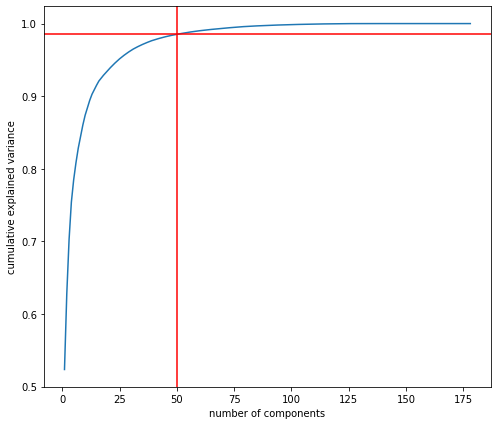

In [249]:
# Ploting the Scree Plot to check how much varience need to explain
cumsum_evr = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,7))
plt.plot(range(1,len(cumsum_evr)+1), cumsum_evr)
plt.axvline(x=50, color= 'r')
plt.axhline(y=0.985, color= 'r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

### From above scree plot we can see that, 98% information is explained by fist 50 principal components. Therefore selecting 50 components for modelling.

In [250]:
#Using incremental PCA for efficiency
pca_final = IncrementalPCA(n_components=50)

In [251]:
# Fitting the new PCs onto the resampled training data
X_train_res_pca = pca_final.fit_transform(X_train_resampled)
print(X_train_res_pca.shape)

#Applying selected 50 components to the test data
X_test_df_pca = pca_final.transform(X_test_df)
print(X_test_df_pca.shape)

(38260, 50)
(8969, 50)


### 1) LOGISTIC REGRESSION

In [252]:
#Training the model on the train data
lr0 = LogisticRegression()

In [253]:
lr0.fit(X_train_res_pca, y_train_resampled)

LogisticRegression()

In [254]:
# Predicting the target var of training data
y_train_pred = lr0.predict(X_train_res_pca)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [255]:
# Predicting the probability of target var of training data
y_train_prob_pred = lr0.predict_proba(X_train_res_pca)
y_train_prob_pred[:,1]

array([0.00492971, 0.13980064, 0.00772093, ..., 0.82252306, 0.90803548,
       0.8259348 ])

In [256]:
# Obtain Accuracy, Recall-Sensitivity and AUC curve
print('Accuracy:', metrics.accuracy_score(y_train_resampled, y_train_pred))
print('Recall-Sensitivity:', metrics.recall_score(y_train_resampled, y_train_pred))
print('AUC Score:', metrics.roc_auc_score(y_train_resampled, y_train_prob_pred[:,1]))

Accuracy: 0.8323314166231051
Recall-Sensitivity: 0.8444851019341348
AUC Score: 0.9035197669452331


In [257]:
# Making predictions on test data
y_test_pred = lr0.predict(X_test_df_pca)
y_test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [258]:
# Validating the predictions with confusion matrics
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy :', (metrics.accuracy_score(y_test,y_test_pred)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_test, y_test_pred )))    

Accuracy : 0.8200468279629836
Sensitivity/Recall : 0.8204081632653061
Specificity: 0.8200145737187272
False Positive Rate: 0.17998542628127276
Positive predictive value: 0.2892086330935252
Negative Predictive value: 0.9808251016850669
sklearn precision score value: 0.2892086330935252


In [259]:
# Lets take a random cutoff point 0.4
y_train_prob_pred1 = lr0.predict_proba(X_train_res_pca)[:,1]

y_df = pd.DataFrame({'churn': y_train_resampled, 'churn_prob': y_train_prob_pred1})

y_df['churn_pred'] = y_df.churn_prob.map(lambda x: 1 if x> 0.4 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.churn_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy :', (metrics.accuracy_score(y_df.churn,y_df.churn_pred)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_df.churn, y_df.churn_pred )))    

Accuracy : 0.817694720334553
Sensitivity/Recall : 0.8934134866701516
Specificity: 0.7419759539989546
False Positive Rate: 0.2580240460010455
Positive predictive value: 0.7759113814863576
Negative Predictive value: 0.8743916712868848
sklearn precision score value: 0.7759113814863576


In [260]:
# Plotting the ROC Curve
def draw_roc( actual_churn, prob_churn ):
    fpr, tpr, thresholds = metrics.roc_curve( actual_churn, prob_churn)
    auc_score = metrics.roc_auc_score( actual_churn, prob_churn)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

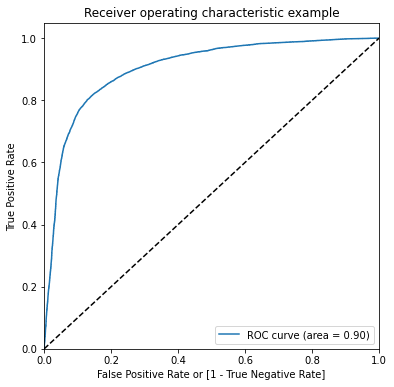

(array([0.        , 0.        , 0.        , ..., 0.98912703, 0.98912703,
        1.        ]),
 array([0.00000000e+00, 5.22739153e-05, 1.04547831e-03, ...,
        9.99947726e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99976585e+00, 9.99765852e-01, 9.97976791e-01, ...,
        8.42297375e-05, 7.99400862e-05, 6.91355730e-11]))

In [261]:
draw_roc(y_train_resampled, y_train_prob_pred1)

In [262]:
y_df.head()

,churn,churn_prob,churn_pred
0,0,0.004930,0
1,1,0.139801,0
2,0,0.007721,0
3,0,0.636809,1
4,0,0.269050,0


In [263]:
# Lets find the optimal cutoff point by creating a function optimal_cutoff
def optimal_cutoff(df):
    num = [float(x/10) for x in range(10)] # list of numbers 0.0 to 0.9
    
    cutoff_df = pd.DataFrame(columns=['Prob', 'Acc', 'Sens', 'Spec'])
    
    for i in num:
        df[i] = df.churn_prob.map(lambda x: 1 if x>i else 0) 
    
        cm = metrics.confusion_matrix(df.churn, df[i])
        total = sum(sum(cm))
    
        acc = (cm[0,0] + cm[1,1])/total
        sens = cm[1,1]/(cm[1,1] + cm[1,0])
        spec = cm[0,0]/(cm[0,0] + cm[0,1])
    
        
        cutoff_df.loc[i] = [i, acc, sens, spec]
    
    print(cutoff_df)
    cutoff_df.plot.line(x='Prob', y=['Acc','Sens','Spec'])
    plt.show()

     Prob       Acc      Sens      Spec
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.675274  0.980450  0.370099
0.2   0.2  0.744956  0.956822  0.533089
0.3   0.3  0.790329  0.929378  0.651281
0.4   0.4  0.817695  0.893413  0.741976
0.5   0.5  0.832331  0.844485  0.820178
0.6   0.6  0.834945  0.792473  0.877418
0.7   0.7  0.815787  0.713121  0.918453
0.8   0.8  0.773549  0.596445  0.950653
0.9   0.9  0.595060  0.204914  0.985206


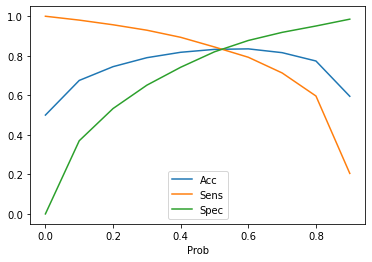

In [264]:
# Checking the optimal cutoff point 
optimal_cutoff(y_df)

In [265]:
# Lets take a final cutoff point 0.5 and make prediction on train data
y_df2 = pd.DataFrame({'churn': y_train_resampled, 'churn_prob': y_train_prob_pred1})

y_df2['churn_pred'] = y_df2.churn_prob.map(lambda x: 1 if x> 0.5 else 0)

confusion = metrics.confusion_matrix(y_df2.churn, y_df2.churn_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy :', (metrics.accuracy_score(y_df2.churn,y_df2.churn_pred)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_df2.churn, y_df2.churn_pred )))   

Accuracy : 0.8323314166231051
Sensitivity/Recall : 0.8444851019341348
Specificity: 0.8201777313120753
False Positive Rate: 0.17982226868792472
Positive predictive value: 0.824445011482521
Negative Predictive value: 0.8406107688186445
sklearn precision score value: 0.824445011482521


In [266]:
# Lets take a final cutoff point 0.5 and make prediction on test data
y_test_prob_pred1 = lr0.predict_proba(X_test_df_pca)[:,1]

y_df3 = pd.DataFrame({'churn': y_test, 'churn_prob_test': y_test_prob_pred1})

y_df3['churn_pred_test'] = y_df3.churn_prob_test.map(lambda x: 1 if x> 0.5 else 0)

confusion = metrics.confusion_matrix(y_df3.churn, y_df3.churn_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy :', (metrics.accuracy_score(y_df3.churn, y_df3.churn_pred_test)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_df3.churn, y_df3.churn_pred_test)))   

y_df3.head()

Accuracy : 0.8200468279629836
Sensitivity/Recall : 0.8204081632653061
Specificity: 0.8200145737187272
False Positive Rate: 0.17998542628127276
Positive predictive value: 0.2892086330935252
Negative Predictive value: 0.9808251016850669
sklearn precision score value: 0.2892086330935252


,churn,churn_prob_test,churn_pred_test
13986,0,0.109526,0
97709,0,0.117839,0
3202,0,0.045129,0
5235,0,0.017431,0
34681,0,0.039379,0


### 2) RANDOM FOREST CLASSIFIER

In [267]:
# Importing required library
from sklearn.ensemble import RandomForestClassifier

# Instatiate the classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Importing Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [5,10,15],
         'min_samples_leaf': [50,100,200],
         'max_features': [4,8,14,20],
         'n_estimators': [10,50,100]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

# Importing time to check the time required for tuning 
import datetime

start_time = datetime.datetime.now()

grid_search.fit(X_train_res_pca, y_train_resampled)

end_time = datetime.datetime.now()
total_time = end_time - start_time
print(f'Total Time for Tuning : {total_time} s')

print()

grid_search.best_estimator_

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Total Time for Tuning : 0:49:26.594917 s



RandomForestClassifier(max_depth=15, max_features=14, min_samples_leaf=50,
                       n_jobs=-1, random_state=42)

In [274]:
# Using the best estimator make prediction on train data
rf_model1 = RandomForestClassifier(max_depth=15, max_features=14, min_samples_leaf=50,
                       n_jobs=-1, random_state=42)

# Fitting the data into the model
rf_model1.fit(X_train_res_pca, y_train_resampled)

# Make prediction on train data
y_train_pred_rf = rf_model1.predict(X_train_res_pca)

# Get train proabilities
y_train_prob_pred2 = rf_model1.predict_proba(X_train_res_pca)[:,1]

# Get test proabilities
y_test_prob_pred2 = rf_model1.predict_proba(X_test_df_pca)[:,1]

# Lets take a final cutoff point 0.5 and make prediction on train data
y_df4 = pd.DataFrame({'churn_rf': y_train_resampled, 'churn_prob_rf': y_train_prob_pred2})

y_df4['churn_pred_rf'] = y_df4.churn_prob_rf.map(lambda x: 1 if x> 0.5 else 0)

confusion = metrics.confusion_matrix(y_df4.churn_rf, y_df4.churn_pred_rf)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Predictions on train data/n')
print('Accuracy :', (metrics.accuracy_score(y_df4.churn_rf, y_df4.churn_pred_rf)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_df4.churn_rf, y_df4.churn_pred_rf))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df4.churn_rf, y_df4.churn_pred_rf)}')

print('*********************************************')

# Check the performance of model on train data
confusion2 = metrics.confusion_matrix(y_df4.churn_rf, y_train_pred_rf)
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

print('Performance of the model/n')
print('Accuracy :', (metrics.accuracy_score(y_df4.churn_rf, y_train_pred_rf)))
print('Sensitivity/Recall :', (TP2 / float(TP2+FN2)))
print('Specificity:', (TN2 / float(TN2+FP2)))
print('False Positive Rate:', (FP2/ float(TN2+FP2)))
print('Positive predictive value:', (TP2 / float(TP2+FP2)))
print('Negative Predictive value:', (TN2 / float(TN2+ FN2)))
print('sklearn precision score value:', (metrics.precision_score(y_df4.churn_rf, y_train_pred_rf))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df4.churn_rf, y_train_pred_rf)}')


y_df4.head()

Predictions on train data/n
Accuracy : 0.8954783063251438
Sensitivity/Recall : 0.8970726607422896
Specificity: 0.893883951907998
False Positive Rate: 0.10611604809200209
Positive predictive value: 0.8942212495440571
Negative Predictive value: 0.8967434055272956
sklearn precision score value: 0.8942212495440571
ROC-AUC Score: 0.8954783063251438
*********************************************
Performance of the model/n
Accuracy : 0.8954783063251438
Sensitivity/Recall : 0.8970726607422896
Specificity: 0.893883951907998
False Positive Rate: 0.10611604809200209
Positive predictive value: 0.8942212495440571
Negative Predictive value: 0.8967434055272956
sklearn precision score value: 0.8942212495440571
ROC-AUC Score: 0.8954783063251438


,churn_rf,churn_prob_rf,churn_pred_rf
0,0,0.019614,0
1,1,0.368254,0
2,0,0.072599,0
3,0,0.720288,1
4,0,0.186669,0


In [275]:
# Lets take a final cutoff point 0.5 and make prediction on test data
y_df5 = pd.DataFrame({'churn_rf': y_test, 'churn_prob_rf': y_test_prob_pred2})

y_df5['churn_pred_rf'] = y_df5.churn_prob_rf.map(lambda x: 1 if x> 0.5 else 0)

confusion = metrics.confusion_matrix(y_df5.churn_rf, y_df5.churn_pred_rf)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy :', (metrics.accuracy_score(y_df5.churn_rf, y_df5.churn_pred_rf)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_df5.churn_rf, y_df5.churn_pred_rf))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df5.churn_rf, y_df5.churn_pred_rf)}')

print('*********************************************')

# Check the performance of model on test data

# Make test Predictions
y_test_pred_rf = rf_model1.predict(X_test_df_pca)

confusion2 = metrics.confusion_matrix(y_df5.churn_rf, y_test_pred_rf)
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

print('Performance of the model/n')
print('Accuracy :', (metrics.accuracy_score(y_df5.churn_rf, y_test_pred_rf)))
print('Sensitivity/Recall :', (TP2 / float(TP2+FN2)))
print('Specificity:', (TN2 / float(TN2+FP2)))
print('False Positive Rate:', (FP2/ float(TN2+FP2)))
print('Positive predictive value:', (TP2 / float(TP2+FP2)))
print('Negative Predictive value:', (TN2 / float(TN2+ FN2)))
print('sklearn precision score value:', (metrics.precision_score(y_df5.churn_rf, y_test_pred_rf))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df5.churn_rf, y_test_pred_rf)}')

y_df5.head()

Accuracy : 0.8725610435946036
Sensitivity/Recall : 0.7646258503401361
Specificity: 0.8821957736215691
False Positive Rate: 0.1178042263784309
Positive predictive value: 0.3668407310704961
Negative Predictive value: 0.9767379319618126
sklearn precision score value: 0.3668407310704961
ROC-AUC Score: 0.8234108119808525
*********************************************
Performance of the model/n
Accuracy : 0.8725610435946036
Sensitivity/Recall : 0.7646258503401361
Specificity: 0.8821957736215691
False Positive Rate: 0.1178042263784309
Positive predictive value: 0.3668407310704961
Negative Predictive value: 0.9767379319618126
sklearn precision score value: 0.3668407310704961
ROC-AUC Score: 0.8234108119808525


,churn_rf,churn_prob_rf,churn_pred_rf
13986,0,0.031462,0
97709,0,0.104476,0
3202,0,0.020368,0
5235,0,0.118476,0
34681,0,0.079345,0


### 3) DECISION TREE CLASSIFIER

In [280]:
# Importing required Libraries
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
dt_model = DecisionTreeClassifier(class_weight='balanced', max_features='sqrt', min_samples_leaf=100, max_depth=5,
                                 random_state=42)
# Fitting the data into the model
dt_model.fit(X_train_res_pca, y_train_resampled)

# Make predictions on test data
y_test_pred_dt1 = dt_model.predict(X_test_df_pca)

print('Model Performance on test data')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_test_pred_dt1)}%')
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_dt1)}')
print(f'Recall/Sensitivity: {metrics.recall_score(y_test, y_test_pred_dt1)}')

Model Performance on test data
Accuracy: 0.7366484557921731%
ROC-AUC Score: 0.7196501481330935
Recall/Sensitivity: 0.6993197278911565


In [281]:
# Create parameter grid to tune the hyper parameters
param2 = {'max_depth': [5,10,15],
         'min_samples_leaf': [50,100,200],
         'min_samples_split': [100,200,400],
         'max_features': [10,15,30]}

# Instantiate the classifier
dt_model2 = DecisionTreeClassifier(class_weight='balanced', random_state=100)

# Initialize the grid search with above parameter grid
grid_search2 = GridSearchCV(estimator=dt_model2, param_grid=param2, n_jobs=4, verbose=1, scoring='accuracy')

# Fitting the data into gridsearch for cross validation 
grid_search2.fit(X_train_res_pca, y_train_resampled)

print(grid_search2.best_estimator_)
print(grid_search2.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_features=30,
                       min_samples_leaf=50, min_samples_split=100,
                       random_state=100)
0.833141662310507


In [282]:
# Using the best estimator fit the data into the DT model
dt_model3 = DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_features=30,
                       min_samples_leaf=50, min_samples_split=100,
                       random_state=100) 
# Fit the data
dt_model3.fit(X_train_res_pca, y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_features=30,
                       min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [284]:
# Make predictions on train data
y_train_pred_dt = dt_model3.predict(X_train_res_pca)

# Get probability prediction for train data
y_train_prob_pred3 = dt_model3.predict_proba(X_train_res_pca)[:,1]
 
# Lets take a final cutoff point 0.5 and make prediction on train data
y_df6 = pd.DataFrame({'churn_dt': y_train_resampled, 'churn_prob_dt': y_train_prob_pred3})

y_df6['churn_pred_dt'] = y_df6.churn_prob_dt.map(lambda x: 1 if x> 0.5 else 0)

confusion = metrics.confusion_matrix(y_df6.churn_dt, y_df6.churn_pred_dt)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Predictions on train data/n')
print('Accuracy :', (metrics.accuracy_score(y_df6.churn_dt, y_df6.churn_pred_dt)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_df6.churn_dt, y_df6.churn_pred_dt))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df6.churn_dt, y_df6.churn_pred_dt)}')

print('*********************************************')

# Check the performance of model on train data
confusion2 = metrics.confusion_matrix(y_df6.churn_dt, y_train_pred_dt)
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

print('Performance of the model')
print('Accuracy :', (metrics.accuracy_score(y_df6.churn_dt, y_train_pred_dt)))
print('Sensitivity/Recall :', (TP2 / float(TP2+FN2)))
print('Specificity:', (TN2 / float(TN2+FP2)))
print('False Positive Rate:', (FP2/ float(TN2+FP2)))
print('Positive predictive value:', (TP2 / float(TP2+FP2)))
print('Negative Predictive value:', (TN2 / float(TN2+ FN2)))
print('sklearn precision score value:', (metrics.precision_score(y_df6.churn_dt, y_train_pred_dt))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df6.churn_dt, y_train_pred_dt)}')


y_df6.head()

Predictions on train data/n
Accuracy : 0.8633298484056455
Sensitivity/Recall : 0.8675901725039206
Specificity: 0.8590695243073706
False Positive Rate: 0.14093047569262937
Positive predictive value: 0.8602601979992743
Negative Predictive value: 0.866452259187009
sklearn precision score value: 0.8602601979992743
ROC-AUC Score: 0.8633298484056455
*********************************************
Performance of the model
Accuracy : 0.8633298484056455
Sensitivity/Recall : 0.8675901725039206
Specificity: 0.8590695243073706
False Positive Rate: 0.14093047569262937
Positive predictive value: 0.8602601979992743
Negative Predictive value: 0.866452259187009
sklearn precision score value: 0.8602601979992743
ROC-AUC Score: 0.8633298484056455


,churn_dt,churn_prob_dt,churn_pred_dt
0,0,0.000000,0
1,1,0.137255,0
2,0,0.000000,0
3,0,0.120000,0
4,0,0.000000,0


In [285]:
# Make predictions on test data
y_test_pred_dt = dt_model3.predict(X_test_df_pca)

# Get probability prediction for test data
y_test_prob_pred3 = dt_model3.predict_proba(X_test_df_pca)[:,1]
 
# Lets take a final cutoff point 0.5 and make prediction on test data
y_df7 = pd.DataFrame({'churn_dt': y_test, 'churn_prob_dt': y_test_prob_pred3})

y_df7['churn_pred_dt'] = y_df7.churn_prob_dt.map(lambda x: 1 if x> 0.5 else 0)

confusion = metrics.confusion_matrix(y_df7.churn_dt, y_df7.churn_pred_dt)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Predictions on test data')
print('Accuracy :', (metrics.accuracy_score(y_df7.churn_dt, y_df7.churn_pred_dt)))
print('Sensitivity/Recall :', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('False Positive Rate:', (FP/ float(TN+FP)))
print('Positive predictive value:', (TP / float(TP+FP)))
print('Negative Predictive value:', (TN / float(TN+ FN)))
print('sklearn precision score value:', (metrics.precision_score(y_df7.churn_dt, y_df7.churn_pred_dt))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df7.churn_dt, y_df7.churn_pred_dt)}')

print('*********************************************')

# Check the performance of model on test data
confusion2 = metrics.confusion_matrix(y_df7.churn_dt, y_test_pred_dt)
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

print('Performance of the model on test data')
print('Accuracy :', (metrics.accuracy_score(y_df7.churn_dt, y_test_pred_dt)))
print('Sensitivity/Recall :', (TP2 / float(TP2+FN2)))
print('Specificity:', (TN2 / float(TN2+FP2)))
print('False Positive Rate:', (FP2/ float(TN2+FP2)))
print('Positive predictive value:', (TP2 / float(TP2+FP2)))
print('Negative Predictive value:', (TN2 / float(TN2+ FN2)))
print('sklearn precision score value:', (metrics.precision_score(y_df7.churn_dt, y_test_pred_dt))) 
print(f'ROC-AUC Score: {metrics.roc_auc_score(y_df7.churn_dt, y_test_pred_dt)}')


y_df7.head()

Predictions on test data
Accuracy : 0.8199353328130227
Sensitivity/Recall : 0.6925170068027211
Specificity: 0.8313092057323294
False Positive Rate: 0.16869079426767064
Positive predictive value: 0.26817702845100105
Negative Predictive value: 0.9680384669777966
sklearn precision score value: 0.26817702845100105
ROC-AUC Score: 0.7619131062675253
*********************************************
Performance of the model on test data
Accuracy : 0.8199353328130227
Sensitivity/Recall : 0.6925170068027211
Specificity: 0.8313092057323294
False Positive Rate: 0.16869079426767064
Positive predictive value: 0.26817702845100105
Negative Predictive value: 0.9680384669777966
sklearn precision score value: 0.26817702845100105
ROC-AUC Score: 0.7619131062675253


,churn_dt,churn_prob_dt,churn_pred_dt
13986,0,0.000000,0
97709,0,0.000000,0
3202,0,0.000000,0
5235,0,0.193548,0
34681,0,0.000000,0


## FOR TEST DATA
## 1) LOGISTIC REGRESSION: RECALL SCORE = 82%
## 2) RF MODEL: RECALL SCORE = 76.46%
## 3) DT MODEL: RECALL SCORE = 69.25%

### THE LOGISTIC REGRESSION MODEL IS PERFORMING BETTER THAN TREE MODELS. DT MODEL AND RF MODEL SLIGHTLY OVERFITTED THE DATA. MORE NUMBER OF HYPERPARAMETERES NEED TO PROVIDE FOR TUNING. THIS WILL INCREASE THE PERFORMANCE OF TREE MODEL.

<AxesSubplot:>

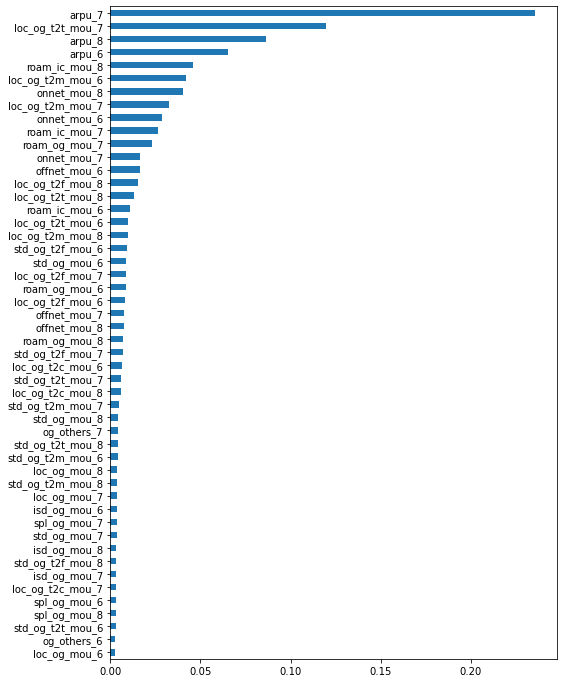

In [307]:
# Lets view the important features
plt.figure(figsize=[8,12])
feat_imp = pd.Series(rf_model1.feature_importances_, index=X.columns[:50])
feat_imp.sort_values().plot(kind='barh')